In [1]:
import sys
sys.path.insert(0,'./src/')
from curve import *
from utility_and_spec import *
import numpy as np
from matplotlib.path import Path
from matplotlib import pyplot as plt
from tube import *
from scipy.interpolate import griddata

In [2]:
scale = 2

In [3]:
l1 = pt(-5,0)
l2 = pt(4,-3)
l3 = pt(4,3)
ls = np.array([l1,l2,l3])/scale
rs = np.array([1,1,1])
pipe = NLets(ls,rs)
shift1 = np.array([0,0])

In [4]:
pipe.build_geometry(max_distance=0.01,legendre_ratio=1e-6 ,n_jobs=4)
pipe.build_A()

In [5]:
pipe.n_pts

4864

In [6]:
pipe.build_omegas(n_jobs=4)
# pipe.build_pressure_drops()
pipe.A = None

In [7]:
pipe.build_plotting_data(density=100,h_mult=4)

In [8]:
t = pipe.t
x = t.real
y = t.imag
xs = pipe.xs
ys = pipe.ys
inside = pipe.inside
# inside = pipe.inside
# nearboundary = pipe.near_boundary

In [9]:
vmin = np.min(pipe.u_fields[0])
vmax = np.max(pipe.u_fields[0])

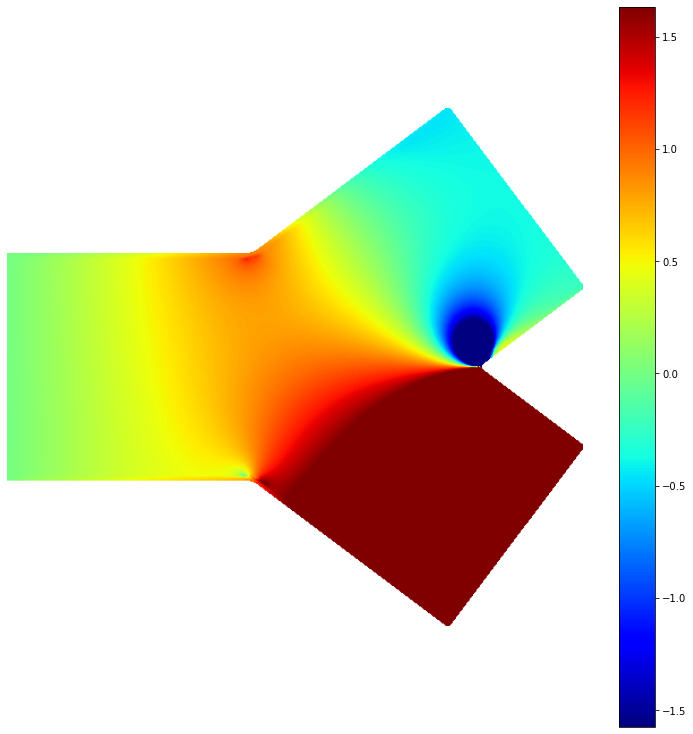

In [15]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_aspect('equal')
im = ax.scatter(pipe.xs[pipe.inside],pipe.ys[pipe.inside],c=pipe.pressure_fields[0][pipe.inside],s=1,vmin=vmin,vmax=vmax,cmap='jet')
# ax.scatter(xs[nearboundary],ys[nearboundary],c=u,s=0.8,vmin=vmin,vmax=vmax)
# im = ax.scatter(xs[nearboundary][np.isnan(u)],ys[nearboundary][np.isnan(u)],c=u2,s=0.8,vmin=vmin,vmax=vmax)
# ax.scatter(x,y,c='black',s=.1)
# fig.colorbar(im)
ax.set_axis_off()
ax.margins(0)
fig.subplots_adjust(left=0,right=1,bottom=0,top=1)
fig.colorbar(im)

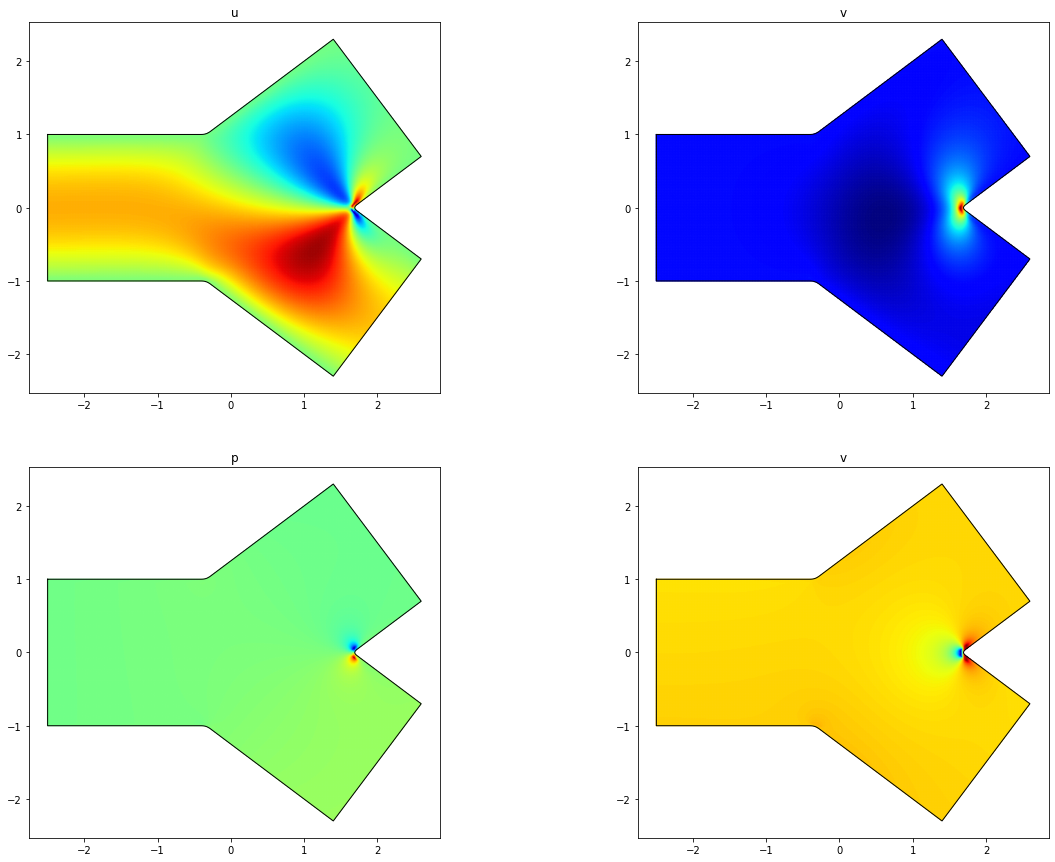

In [14]:
fig,axes = plt.subplots(2,2,figsize=(20,15))
for ax,fields,name in zip(axes.flatten(),(pipe.u_fields,pipe.v_fields,pipe.pressure_fields,pipe.vorticity_fields),'uvpv'):
    ax.set_aspect('equal')
    ax.scatter(pipe.xs[pipe.inside],pipe.ys[pipe.inside],c=fields[0][pipe.inside],s=.2,cmap='jet')
    ax.plot(*(pipe.closed_boundary.T),c='black',linewidth=1)
    ax.title.set_text(name)

I should use scatter plot instead of imshow to plot all the datas. 